<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Identified-prenylated-proteins" data-toc-modified-id="Identified-prenylated-proteins-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Identified prenylated proteins</a></span></li><li><span><a href="#How-many-of-the-identified-proteins-have-been-previously-known-to-be-farnesylated-or-geranylgeranylated?" data-toc-modified-id="How-many-of-the-identified-proteins-have-been-previously-known-to-be-farnesylated-or-geranylgeranylated?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How many of the identified proteins have been previously known to be farnesylated or geranylgeranylated?</a></span></li><li><span><a href="#Enrichment?-Hypergeometric-distribution-and-Fisher's-exact-test" data-toc-modified-id="Enrichment?-Hypergeometric-distribution-and-Fisher's-exact-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Enrichment? Hypergeometric distribution and Fisher's exact test</a></span></li><li><span><a href="#How-many-proteins-were-not-previously-known-to-be-prenylated?" data-toc-modified-id="How-many-proteins-were-not-previously-known-to-be-prenylated?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How many proteins were not previously known to be prenylated?</a></span></li><li><span><a href="#On-the-basis-of-what-information?" data-toc-modified-id="On-the-basis-of-what-information?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>On the basis of what information?</a></span></li></ul></div>

In [1]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [2]:
import pandas as pd
import numpy as np
from functions import clean_agg
from functions import fishers_exact_test
from scipy.stats import hypergeom
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
from matplotlib.cbook import flatten

In [3]:
# Display session information
session_info.show()

In [4]:
datafolder = 'data'
figures = 'data/figures'
known_proteins_datafolder = '../1_Known_prenylated_proteins/data'

In [5]:
# Load data

# Uniprot known prenylated proteins
all_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_all.csv'), dtype='object', sep=';')
F_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_F.csv'), dtype='object', sep=';')
GG_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_GG.csv'), dtype='object', sep=';')

# All identified prenylated proteins
all_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all.csv'), sep=',')
known_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',')
novel_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel.csv'), sep=',')

# Identified prenylated proteins

In [6]:
# known
F_only_UP = F_UP[~F_UP['ID'].isin(GG_UP['ID'])].reset_index(drop=True)
GG_only_UP = GG_UP[~GG_UP['ID'].isin(F_UP['ID'])].reset_index(drop=True)
F_GG_UP = all_UP[all_UP['ID'].isin(F_UP['ID']) & all_UP['ID'].isin(GG_UP['ID'])].reset_index(drop=True)

print('All known:', len(all_UP), ', F only known:', len(F_only_UP), ', GG only known:', len(GG_only_UP), ', F & GG known:', len(F_GG_UP))

All known: 183 , F only known: 70 , GG only known: 111 , F & GG known: 2


In [7]:
# identified, lists of ID
F_found = all_found[all_found['Exp_moiety'] == 'S-farnesyl cysteine']
GG_found = all_found[all_found['Exp_moiety'] == 'S-geranylgeranyl cysteine']
F_GG_found = all_found[all_found['Exp_moiety'] == '[S-farnesyl cysteine, S-geranylgeranyl cysteine]']

print('All identified:', len(all_found), ', F only identified:', len(F_found), ', GG only identified:', len(GG_found), ', F & GG identified:', len(F_GG_found))

All identified: 636 , F only identified: 274 , GG only identified: 159 , F & GG identified: 203


In [8]:
F_found[F_found['motif'] == 'CXC']

,ID,name,fullName,substrate,location,moiety,AminoAcid,position,evidenceCode,publication,ProteinEntryReviewed,Exp_moiety,motif,pep
574,P20340,RAB6A,Ras-related protein Rab-6A,Rab,Membrane,S-geranylgeranyl cysteine,C,"[-3, -1]",ECO_0000250,NaN,True,S-farnesyl cysteine,CXC,QPVSEGGCSC


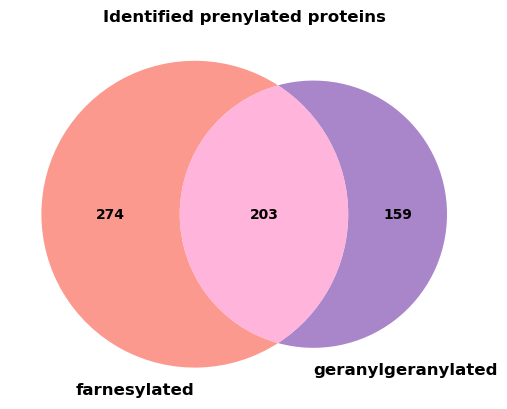

In [9]:
sets = {
    '01': len(GG_found),
    '10': len(F_found),
    '11': len(F_GG_found)
}
venn2(subsets=sets, set_labels=('farnesylated', 'geranylgeranylated'),  set_colors=('salmon', 'tab:purple'), alpha=0.8)

plt.title('Identified prenylated proteins')

plt.show()

# How many of the identified proteins have been previously known to be farnesylated or geranylgeranylated? 

In [10]:
all_known_identified = all_UP[all_UP['ID'].isin(all_found['ID'])]
F_known_identified = F_UP[F_UP['ID'].isin(F_found['ID'])]
GG_known_identified = GG_UP[GG_UP['ID'].isin(GG_found['ID'])]
F_GG_known_identified = F_GG_UP[F_GG_UP['ID'].isin(F_GG_found['ID'])]

print('All known identified:', len(all_known_identified), ', F known identified:', len(F_known_identified), 
      ', GG known identified:', len(GG_known_identified), ', F & GG known identified:', len(F_GG_known_identified))

All known identified: 78 , F known identified: 31 , GG known identified: 14 , F & GG known identified: 1


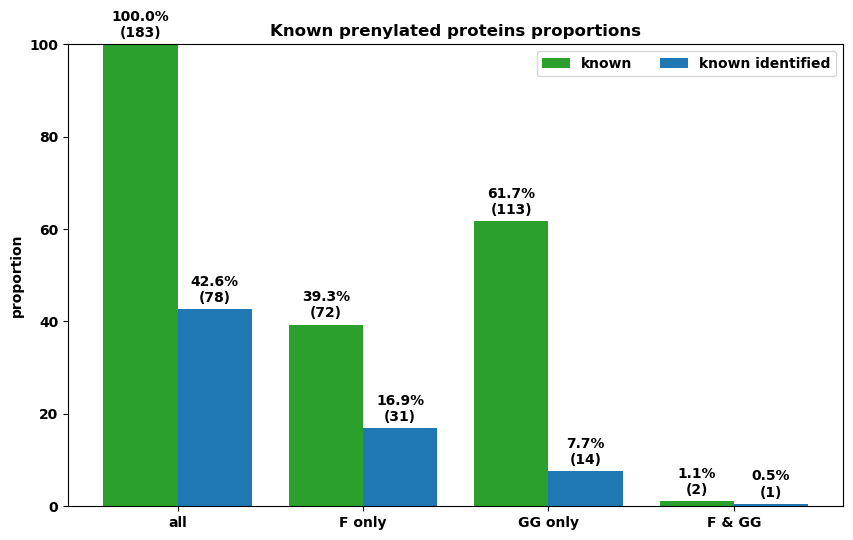

In [11]:
motifs = ("all", "F only", "GG only", "F & GG")
group_counts = {
    'known': [len(all_UP), len(F_UP), len(GG_UP), len(F_GG_UP)],
    'known identified': [len(all_known_identified), len(F_known_identified), len(GG_known_identified), len(F_GG_known_identified)],
}

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['tab:green', 'tab:blue'])

group_proportions = {key: [(x / len(all_UP)) * 100 for x in value] for key, value in group_counts.items()}

group_labels = {key: [f"{round(prop, 1)}%\n({count})" for prop, count in zip(group_proportions[key], group_counts[key])] for key in group_counts}

x = np.arange(len(motifs))
width = 0.4
multiplier = 1 - (len(group_counts) - 1) / 2

fig, ax = plt.subplots(figsize=(10, 6))

for i, (attribute, measurement) in enumerate(group_proportions.items()):
    offset = width * (multiplier + i)
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, group_labels[attribute], padding=3)

ax.set_ylabel('proportion')
ax.set_title('Known prenylated proteins proportions')
ax.set_xticks(x + width, motifs)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 100)
plt.rcParams.update({'font.size': 13})

# save
plt.savefig(os.path.join(figures, 'bars_known_proteins.pdf'), bbox_inches='tight')

plt.show()


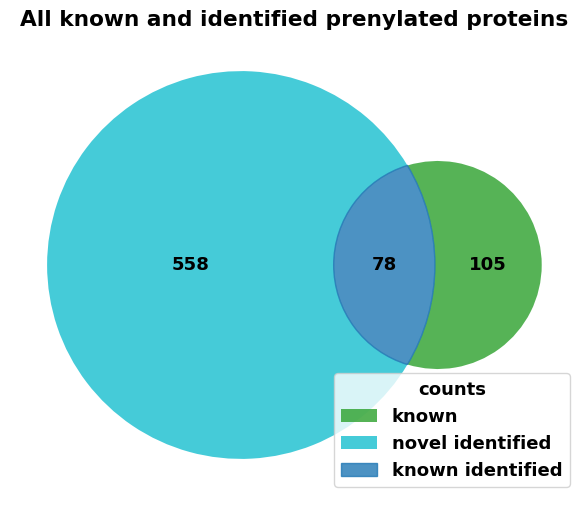

In [12]:
# Overlap all known proteins and all identified proteins
# all

set_known = set(all_UP['ID'])
set_identified = set(all_found['ID'])

# Calculate the subsets for the Venn diagram
subset_known_only = len(set_known - set_identified)
subset_identified_only = len(set_identified - set_known)
subset_both = len(set_known & set_identified)

sets = {
    '01': subset_known_only,
    '10': subset_identified_only,
    '11': subset_both
}

plt.figure(figsize=(10, 6))
ax = plt.gca()
v = venn2(subsets=sets, set_labels=('', ''), ax=ax, set_colors=('tab:cyan', 'tab:green'), alpha=0.8)

# Set edge color of the overlap
overlap_patch = v.get_patch_by_id('11')
overlap_patch.set_color('tab:blue')  # Set the color to purple, replace with any color you prefer

h = []
for i in sets:
    h.append(v.get_patch_by_id(i))

l = ['known', 'novel identified', 'known identified']

ax.legend(handles=h, labels=l, title="counts", loc='lower right')

plt.title('All known and identified prenylated proteins')

# save
plt.savefig(os.path.join(figures, 'venn_known_identified.pdf'), bbox_inches='tight')

plt.show()

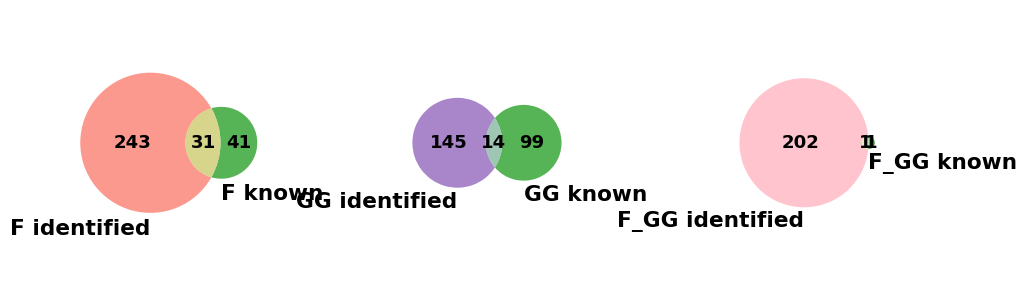

In [13]:
figure, axes = plt.subplots(1, 3, figsize=(11.69,8.27))

d1=(len(set(F_found['ID'])), (len(set(F_found['ID'])) - len(set(F_UP['ID']))), len(set(F_UP['ID'])))
d2=(len(set(GG_found['ID'])), (len(set(GG_found['ID'])) - len(set(GG_UP['ID']))), len(set(GG_UP['ID'])))
d3=(len(set(F_GG_found['ID'])), (len(set(F_GG_found['ID'])) - len(set(F_GG_UP['ID']))), len(set(F_GG_UP['ID'])))

v1=venn2([set(F_found['ID']), set(F_UP['ID'])], set_labels = ('F identified', 'F known'), ax=axes[0], set_colors=('salmon', 'tab:green'), alpha=0.8)
v2=venn2([set(GG_found['ID']), set(GG_UP['ID'])], set_labels = ('GG identified', 'GG known'), ax=axes[1], set_colors=('tab:purple', 'tab:green'), alpha=0.8)
v3=venn2([set(F_GG_found['ID']), set(F_GG_UP['ID'])], set_labels = ('F_GG identified', 'F_GG known'), ax=axes[2], set_colors=('lightpink', 'tab:green'), alpha=0.8)

data = [d1, d2, d3]
max_area = max(map(sum, data))

def set_venn_scale(ax, true_area, reference_area=max_area):
    s = np.sqrt(float(reference_area)/true_area)
    ax.set_xlim(-s, s)
    ax.set_ylim(-s, s)

for a, d in zip(flatten(axes), data):
    set_venn_scale(a, sum(d))

# save
plt.savefig(os.path.join(figures, 'venn_F_GG_known_identified.pdf'), bbox_inches='tight')

plt.show()

In [14]:
# Identified proteins are known to be prenylated but not with the same moiety as the known ones!

known_found.query('moiety != Exp_moiety').reset_index(drop=True)

,ID,name,fullName,substrate,location,moiety,AminoAcid,position,evidenceCode,publication,ProteinEntryReviewed,motif,pep,Exp_moiety
0,O95164,UBL3,Ubiquitin-like protein 3,UBL3,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000305,doi:10.1074/jbc.m602283200,True,CAAX,TGESNCCVIL,S-farnesyl cysteine
1,P04899,GNAI2,Guanine nucleotide-binding protein G(i) subuni...,G-alpha,Membrane,S-farnesyl cysteine,C,-4,extended_search,doi:10.1039/c3mb70593e,True,CAAX,KNNLKDCGLF,S-geranylgeranyl cysteine
2,P08134,RHOC,Rho-related GTP-binding protein RhoC,Rho,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000250,NaN,True,CXXX,NKRRRGCPIL,"[S-farnesyl cysteine, S-geranylgeranyl cysteine]"
3,P09543,CN37,"2',3'-cyclic-nucleotide 3'-phosphodiesterase",CNPase,Membrane,S-farnesyl cysteine,C,-4,ECO_0000250,NaN,True,CXXX,GGALQSCTII,"[S-farnesyl cysteine, S-geranylgeranyl cysteine]"
4,P11233,RALA,Ras-related protein Ral-A,Ras,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000269,"['doi:10.1016/s0021-9258(18)92889-9', 'doi:10....",True,CXXX,KRIRERCCIL,"[S-farnesyl cysteine, S-geranylgeranyl cysteine]"
5,P11234,RALB,Ras-related protein Ral-B,Ras,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000269,doi:10.1128/mcb.00057-07,True,CXXX,KSFKERCCLL,"[S-farnesyl cysteine, S-geranylgeranyl cysteine]"
6,P15153,RAC2,Ras-related C3 botulinum toxin substrate 2,Rho,Cytoplasm,S-geranylgeranyl cysteine,C,-4,ECO_0000269,doi:10.1016/s0021-9258(18)92889-9,True,CXXX,RQQKRACSLL,"[S-farnesyl cysteine, S-geranylgeranyl cysteine]"
7,P20340,RAB6A,Ras-related protein Rab-6A,Rab,Membrane,S-geranylgeranyl cysteine,C,"[-3, -1]",ECO_0000250,NaN,True,CXC,QPVSEGGCSC,S-farnesyl cysteine
8,P32456,GBP2,Guanylate-binding protein 2,GB1/RHD3 GTPase,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000269,doi:10.1371/journal.pone.0014246,True,CXXX,KSLEPICNIL,"[S-farnesyl cysteine, S-geranylgeranyl cysteine]"
9,P50151,GBG10,Guanine nucleotide-binding protein G(I)/G(S)/G...,G protein gamma,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000269,doi:10.1074/jbc.270.37.21765,True,CAAX,FREPRSCALL,S-farnesyl cysteine


# Enrichment? Hypergeometric distribution and Fisher's exact test

Premise: randomly choose 636 proteins from the human proteome.
Expected N of known prenylated proteins:  4
Actual N of identified known prenylated proteins:  78


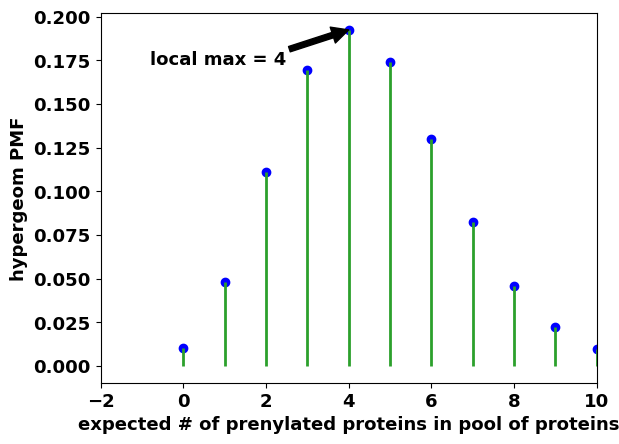

The difference between actual and expected amount of proteins has a p-value=2.49e-76(****). 
We have significantly more enriched proteins than randomly expected.


In [15]:
# -> We have a collection of 20'000 proteins in the human proteome, of which 183 are known to be prenylated.
# We want to know the probability of finding a given number of prenylated proteins if we randomly choose N of 
# the 20'000 human proteins.

print('Premise: randomly choose', len(all_found), 'proteins from the human proteome.')

[M, n, N] = [25866, len(all_UP), len(all_found)]

rv = hypergeom(M, n, N)
x = np.arange(0, n+1)

pmf_all_p = rv.pmf(x)

print('Expected N of known prenylated proteins: ', np.argmax(pmf_all_p))
print('Actual N of identified known prenylated proteins: ', len(all_known_identified))

fig, ax = plt.subplots()
ax.plot(x, pmf_all_p, 'bo')
ax.vlines(x, 0, pmf_all_p, lw=2)
plt.xlim(-2, 10)
ax.set_xlabel('expected # of prenylated proteins in pool of proteins')
ax.set_ylabel('hypergeom PMF')

ax.annotate('local max = 4', xy=(np.argmax(pmf_all_p), pmf_all_p[np.argmax(pmf_all_p)]), xycoords='data',
            xytext=(0.1, 0.9), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black'))

plt.show()

p_value = fishers_exact_test(len(all_known_identified), N, n, M)

print('The difference between actual and expected amount of proteins has a p-value=', 
      "{:.2e}".format(p_value), '(****). \nWe have significantly more enriched proteins than randomly expected.', sep='')

# How many proteins were not previously known to be prenylated?

In [16]:
# identified, lists of ID
novel_F_found = novel_found[novel_found['Exp_moiety'] == 'S-farnesyl cysteine']
novel_GG_found = novel_found[novel_found['Exp_moiety'] == 'S-geranylgeranyl cysteine']
novel_F_GG_found = novel_found[novel_found['Exp_moiety'] == '[S-farnesyl cysteine, S-geranylgeranyl cysteine]']

print('All novel identified:', len(novel_found), ', F novel identified:', len(novel_F_found), ', GG novel identified:', len(novel_GG_found), ', F & GG novel identified:', len(novel_F_GG_found))

All novel identified: 558 , F novel identified: 234 , GG novel identified: 144 , F & GG novel identified: 180


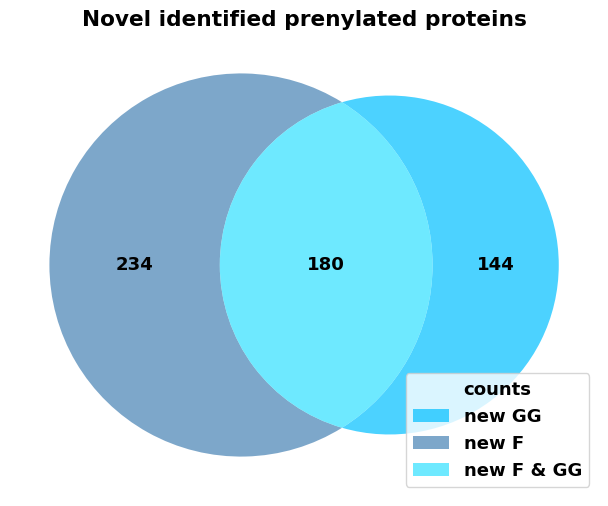

In [17]:
# Overlap all new identified proteins
# all G and F

# Calculate the subsets for the Venn diagram
subset_new_F_only = len(novel_F_found)
subset_new_GG_only = len(novel_GG_found)
subset_both = len(novel_F_GG_found)

sets = {
    '01': subset_new_GG_only,
    '10': subset_new_F_only,
    '11': subset_both
}


plt.figure(figsize=(10,6)) 
ax = plt.gca()
v = venn2(subsets=sets, set_labels=('',''), ax=ax, set_colors=('steelblue', 'deepskyblue'), alpha=0.7)

h = []
for i in sets:
    h.append(v.get_patch_by_id(i))  
    
l = ['new GG','new F','new F & GG']

ax.legend(handles=h, labels=l, title="counts",loc='lower right')  

plt.title('Novel identified prenylated proteins')

# save
plt.savefig(os.path.join(figures, 'venn_novel_identified.pdf'), bbox_inches='tight')

plt.show()

# On the basis of what information?

In [18]:
# List of identified proteins that are in the uniprot list, already known to be prenylated

# isolate the evidence code of these identified known proteins
evidence = known_found[['ID', 'evidenceCode', 'publication']]
evidence = evidence.drop_duplicates()

# aggregate on ID to get one entry per protein
agg_evidence = evidence.groupby('ID').agg(set).reset_index()
agg_evidence = clean_agg(agg_evidence)

In [19]:
# Count how many proteins have which evidence code

agg_evidence['evidenceCode'].value_counts()

# ECO_0000269    Experimental evidence (experimental + manual assertion)
# ECO_0000250    Sequence similarity evidence (manual assertion)
# ECO_0007744    Combinatorial evidence (manual assertion)
# ECO_0000305    Curator inference evidence (manual assertion)

evidenceCode
ECO_0000250                                      34
ECO_0000269                                      31
extended_search                                   7
['ECO_0000269', 'ECO_0007744']                    2
['ECO_0000269', 'extended_search']                1
ECO_0000305                                       1
['ECO_0000269', 'ECO_0000305', 'ECO_0007744']     1
ECO_0000255                                       1
Name: count, dtype: int64

In [20]:
# evidence codes of identified known proteins that have a publication

df = agg_evidence[agg_evidence['publication'].notna()]

print(df['evidenceCode'].value_counts())

evidenceCode
ECO_0000269                                      31
extended_search                                   7
['ECO_0000269', 'ECO_0007744']                    2
['ECO_0000269', 'extended_search']                1
ECO_0000305                                       1
['ECO_0000269', 'ECO_0000305', 'ECO_0007744']     1
Name: count, dtype: int64
